# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
The simulation is that of a city traffic. In the environment we find several cars obeying traffic rules like, cars move on green signal and halt on red signals. Also we dont see any accidents.

Our car is the stationary white car. At the top of the screen 2 messages are constant. "!! Agent state not updated!" and "Agent not enforced to meet deadline". There are 3 other messages which gets updated real time. If the car does not move on red signal we are awarded positive points and the message "Agent idled at a red light!" is written in green color. If the car does not move on green signal with no oncoming traffic we are penalised heavily and message "There was a green light with no oncoming traffic" is written in red color. FInally If the car does not move on green signal due to oncoming traffic we are rewared positive points and message "Agent ided at a green light with oncoming traffic" is written on the screen.

For positive actions we are awarded points and for negative actions we are penalised. Despite not taking any actions the points are getting updated. It'll be of interest to see how these points are updated when the smartcab moves during simulation

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
1) agent.py :- Below, I discuss 3 flags:
    - grid_size: It sets the number of intersections (roads), default value is 8 roads along the column and 6 roads along the rows. By adding grid_size flag in the Environment() we can set change the default setting and add a grid-size of our choice
    - alpha: The formula for computing Q for any state-action pair <s, a>, given an experience tuple <s, a, s', r>, is:
                       Q'[s, a] = (1 - α) · Q[s, a] + α · (r +  γ· Q[s', argmaxa'(Q[s', a'])])
                       alpha = α is the continous value for learning rate,  with default = .5, higher value of alpha gives high value to the long term utility maximisation
    - update_delay: continuous time (in seconds) between actions, default is 2.0 seconds.
    
2) environment.py :- When an agent performs an action, env.act(agent, action) is called. This gets called from LearningAgent.update() which is called when a time step is completed for a given trial

3) simulator.py :- render_text() is the Non-GUI render display of the simulation. Infact the ouput is displayed n the command prompt. whereas render() is the GUI display of the simulation

4) planner.py :- 'next_waypoint()' function considers the East-West firection first, this is clearly seen in the code 
       # Next check if destination is cardinally East or West of location    
        elif dx != 0:...

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


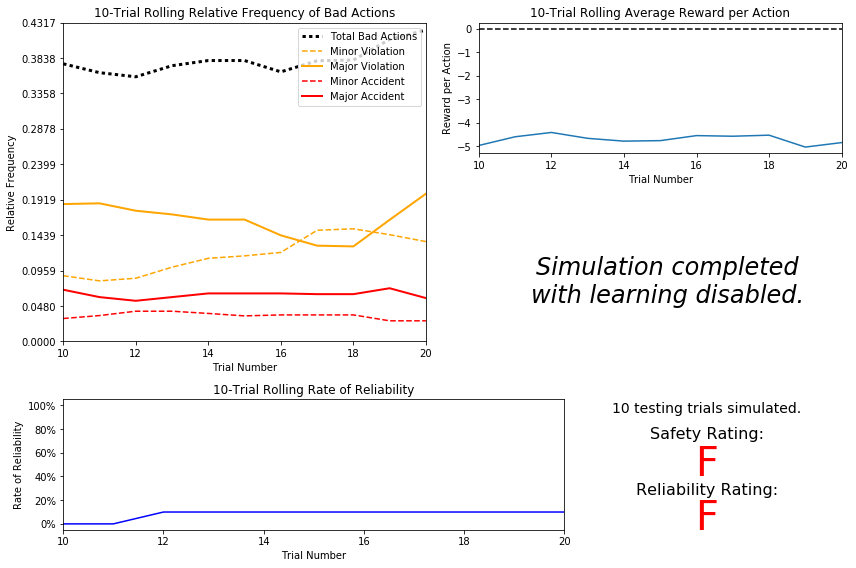

In [5]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
As Learning is disabled and all our policies are random, out results are poor.
On average, the driving agent makes 38% of bad decisions, Around 10% of total decisions result in accident, so 27% of bad decisions cause Accidents(both minor and major).
Bad decisions frequency is the cumulative sum of Minor Violation, Major Violation, Minor Accident and Major Accident frequencies.

Here, the Rate of reliability is an indicator of how reliable the agent is, given he chooses actions randomly. From the graph we observe that rate of reliability is consistently very poor, around 12% after 12 trails, as the agent is always exploring but not learning from the past states. This rate of reliability makes sense as the poor results are consistent with the random behaviour. The results should improve after we implement Q-learning as only those actions are taken that maximise the overall reward.

On average agent is penalised instead of rewarded for its actions and for each Trail he is penalised 3 points. Very bad actions like Bad accidents are penalised very heavily (-40) and the penalty decreases upon the nature of crime. As all actions are random it is hard to say much about overall penalty for each trial. But I agree with the scoring mechanism of penalising heavily for bad actions and decreasing as the severity of crime decreases

We also observe that as the number of trials increases the outcome fo results do not change significantly. It appears that during the entire course of journey there is atleast one major accident which severly impacts the reward and reliability.

If the actions are chosen randomly such as now, the agent is definately not safe and reliable as it is relying only on luck without learning. This is confirmed by the overall rating, Safety Rating: F and Reliability Rating: F

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**
Apart from the sensor data we also have information about **location, heading, destination**

One of the challenges here is increasing the number of features will exponentially increase the number of states thus requiring a lot of training. At the same time, we need to choose those features that can help us measure the Safety and Reliability of the agent. I discuss in detail the features I choose for each of safety and reliability.

**Safety: ** Based on the Safety ratings, we observe that there is emphasis on the traffic light and the intended direction of vehicles around the agent in evaluting the rating.
So we need atleast 2 features to capture this information.
    - 1st is 'light' : There are 2 values True and False
**Update**
    - Since the model should learn on its own, I would like to have the following states
    - inputs['left'] : intended direction of travel for vehicles to the agents's left
    - inputs['oncoming'] : intended direction of travel for vehicles across the intersection from the agent
 I have not included inputs['right'] as adding it will increase the state space by a factor of 4. Besides for the US traffic system, if the agent wants to take a right turn he may take so when it is appropriate but to take a left turn he needs to see the both the oncoming and left vehicles even if there is a green light (as shown in the video https://www.youtube.com/watch?v=0EdkxI6NeuA). For this reason I choose 'incoming' and 'left' and as there is a tradeoff between features and number of states I did not include 'right'.

Reliability: waypoint and deadline both convey this status of Reliabitlity. However, adding deadline drastically increases the number of states making it difficult to train the model. Further it is also not needed as Reliability can be measured if the agent reached the destination on time. i.e it can be calcualted at the final step. But for the intermediate steps waypoint is a good indicator of reliability, as if the agent more often than not chooses the direction indicated by waypoint he will reach the destination on time.

Thus, my feature set for any state is {waypoint, light, inputs['left'], inputs['right']}

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
If I include all features without any filtering the number of states would be
**waypoint:** forward, left, right (None means agent has reached destination, hence i have not added it as part of state space. It is an absorbing state)
**light   :** True, False
**left    :** None, forward, left, right
**right   :** None, forward, left, right
**oncoming:** None, forward, left, right
**deadline:** 25 bins, if we divide the whole distance into 25 actions

The total state space size is 3 * 2 * 4 * 4 * 4 *25 = 9600 states. Practically impossible to train a model with so many states.

With my definition of State. the number of states
**waypoint:** forward, left, right (None means agent has reached destination and any combination of None with other features is irrelevant as agent has already reached and no further action needs to taken from destination)
**light   :** Red, Green
**left    :**  None, forward, left, right
**right   :**  None, forward, left, right
The total state space size is 3 * 2 * 4 * 4 = 96. 

To ensure the model trains properly number of trails should be atleast 150. in these 150 trials we shall have a total of 150*30 = 4,500 (state,action) tuples. The distribution of each state shall vary but each state has good probability of being covered as compared to a lesser training trails.


I have used this number of trails, 150, when I did my optimisation. However for default learning, I used the default parameters, like number of trails = 20 and a linear epsilon function.

Further, adding more states would make training the model very difficult as size of state space  increases exponentially with the number of training trials.


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

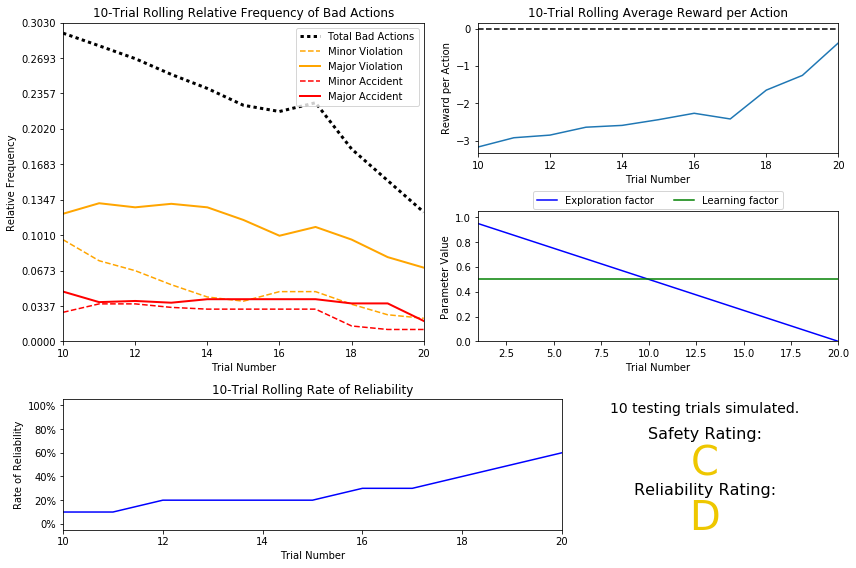

In [29]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
The results have improved after implementing Q-Learning algorithm.
In the beginning of training, there are similartites between basic driving agent and default-Q-Learning agent as both these methods relied on random choice of actions. 

In all there were 20 training trails. This looks good as the relative frequencies of bad actions decreased as the number of trials increased and finally plateauing at about 10%. However Major Accidents and Major Violations are still high which is reflecting in Safety and Relaiability Ratings.

Yes the decaying function is correctly represented in the parameters panel, as its value decreased from 0.95 at the 1st trial to 0 at the end of 20th trial.

From the 2nd graph, we observe that reward per action increased from -2.2 at the end of 1st trial to close to -0.2 at the end of 20th trial. Both the ratings have improved compared to random actions model. However, the ratings are not optimum, indicating the model needs to find optimal parameters to make it more efficient.



-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

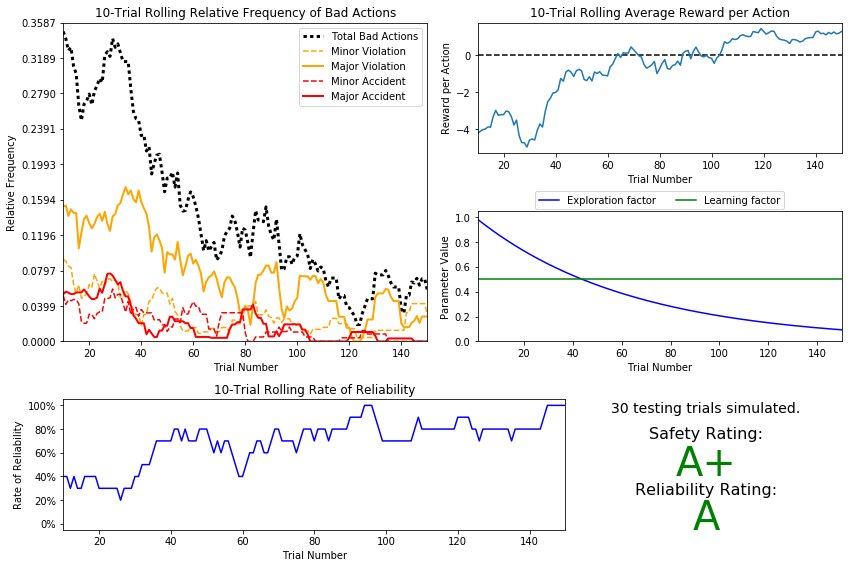

In [26]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
Overall, I tried 
epsilon_decay_params = [ '0.9 ^ (0.15*t)', '1/t^2', 'cos(at)', 'linear']
alpha_learning_params = [0.4, 0.5, 0.6]
n_test_params = [10, 15]
tolerance_params = [0.05, 0.2]

Among these, decay function	ε = 0.9^(0.15*t) produced the best results. Further, with same set of parameter values (alpha = 0.5, n_tests = 30, tolerance = 0.2) I repeated the experiment and everytime it has the best reward function. Also Safety ratings varied from (A+,A), and reliabitlity rating was consistently A.

It took 150 training trails before it began testing.

Ratings wise Default-Q-learner has similar Safety rating as compared to this Q-Learner. However, it has consistently scored higher rewards per action, lesser relative frequencies of bad actions and most importantly better Relability Rating.

Yes, the driving agent has succesfully learned a policy major accidents are 0 and Major violations are decreasing as the training times are increased indicating that it is learning with training

I am definately satisfied as it consistenly gives A+ Safety rating, A reliability rating. Also other metrics like higher reward per action and lower frequencies of bad actions makes it a superior model

Another interesting point, is reliability is increasing with training samples indicating it is learning.


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 
Below I discuss a few different cases 

1) When it is Red light
From the txt file we see that 
    ('forward', 'red', None, 'forward')
    -- forward : -9.91
    -- right : 1.20
    -- None : 2.18
    -- left : -10.07
The agent should stop as he cannt move forward when it is red 
  
  ('right', 'red', None, 'forward')
    -- forward : -9.28
    -- right : 1.48
    -- None : 2.22
    -- left : -9.72
now we have oncoming forward traffic, but there is no forward traffic from the left. so the agent shold move right. However, the model takes None action indicating a sub optimal policy

   ('right', 'red', None, None)
    -- forward : -10.34
    -- right : 2.03
    -- None : 1.14
    -- left : -9.57
Now he can move right as there is no traffic from Left and oncoming. This is the action taken by our model!

   ('left', 'red', 'right', 'left')
     -- forward : 0.00
     -- right : 1.21
     -- None : 0.58
     -- left : 0.00
     
Ideally it should stop but it takes a right direction. This may have happened due to less training of this state. As this state is not captured in the enviroment.act(agent, action) when action==right conditional statement, we have positive Q value for right action
 
 2) When it is Green light
     
  ('forward', 'green', None, 'forward')
     -- forward : 2.02
     -- right : 0.58
     -- None : -5.04
     -- left : -19.82
  This is an intersting scenario as it should go forward as the oncoming traffic does not block agent's path. 
  
  ('left', 'green', None, None)
    -- forward : 0.67
    -- right : 0.51
    -- None : -4.68
    -- left : 1.66
   This is relatively straightforward and agent took the tight decision
  
  ('right', 'green', 'forward', None)
     -- forward : 0.37
     -- right : 1.70
     -- None : -3.74
     -- left : 0.59
  This is another interesting scenario as agent chose the 'right' action with left traffic taking forward action. It should have been None but None has the least Q score.
   
  

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
From the environment perspective: Couple of reasons why we need to invalidate the use of future rewards. Firtsly the enviroment changes and the start and destination are different for each trial. So it is not possible to find other optimal paths based on long term Max utility if the destination and source changes every time. In case we want to still use this feature, other optimal paths, then it would require our model to learn (8*6)C2 different cases and find different optimal paths for each. It is impossible and makes no sense to train our model to identify other optimal paths for each combination of (source, destination) when we extend the grid to real life scale.
Secondly, if the traffic is red light or if it is Green with oncoming traffic the agent should not move however big the future reward might be for any other action other than None. Changing the action in the hope of better future reward will lead to accident which is not desirable.

From the smartcab perspective making decisions based the future states (waypoint, light,  response_to_surroundings) does not look  right as we can not predict the traffic light and the response_to_surroundings features of the future states. The only feature that can be predicted in waypoint. So expecting higher future rewards with stochastic future states can not be solved by Q-learning or MDP. In Q-learning and MDP we expect the future states to be deterministic. So one workaround is if we ignore traffic and response_to_surroundings from our state space, then we can include the future rewards into our Q-Learning model

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.